In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
import warnings
warnings.filterwarnings('ignore')   #warning genrated during execution are ignored

In [3]:
dataset = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
print("Data CSV")
print(dataset.head(),"\n")

print("Features CSV")
print(features.head(),"\n")

print("Stores CSV")
print(stores.head())

Data CSV
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Features CSV
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN   

In [4]:
print("Data INFO")
print(dataset.info(),"\n")

print("Features INFO")
print(dataset.info(),"\n")

print("Stores INFO")
print(dataset.info())

Data INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None 

Features INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage

In [5]:
print("Data Shape",dataset.shape)
print("Features Shape",features.shape)
print("Store Shape",stores.shape)

Data Shape (421570, 5)
Features Shape (8190, 12)
Store Shape (45, 3)


In [6]:
#Merging the Datasets
final_dataset = dataset.merge(features,'right').merge(stores,'left')
final_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
final_dataset.shape

(423325, 16)

In [8]:
#Dropping the columns
final_dataset = final_dataset.drop(['Store','Date','Type'],axis=1)

In [10]:
#Getting the null values
final_dataset.isna().sum()

Dept              1755
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Size                 0
dtype: int64

In [11]:
final_dataset.columns

Index(['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
final_dataset = imputer.fit_transform(final_dataset)

In [13]:
final_dataset = pd.DataFrame(final_dataset,columns=['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'])
final_dataset.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1.0,24924.50,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
1,2.0,50605.27,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
2,3.0,13740.12,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
3,4.0,39954.04,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
4,5.0,32229.38,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0


In [14]:
final_dataset.isna().sum()

Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [15]:
#Get dummies
final_dataset = pd.get_dummies(final_dataset)
final_dataset.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1.0,24924.50,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
1,2.0,50605.27,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
2,3.0,13740.12,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
3,4.0,39954.04,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
4,5.0,32229.38,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0


In [16]:
#Getting the coorelation
corr = final_dataset.corr()['Weekly_Sales']
corr

Dept            0.148337
Weekly_Sales    1.000000
IsHoliday       0.012703
Temperature    -0.001850
Fuel_Price     -0.000848
MarkDown1       0.051875
MarkDown2       0.019745
MarkDown3       0.037662
MarkDown4       0.033217
MarkDown5       0.052858
CPI            -0.021185
Unemployment   -0.025203
Size            0.243373
Name: Weekly_Sales, dtype: float64

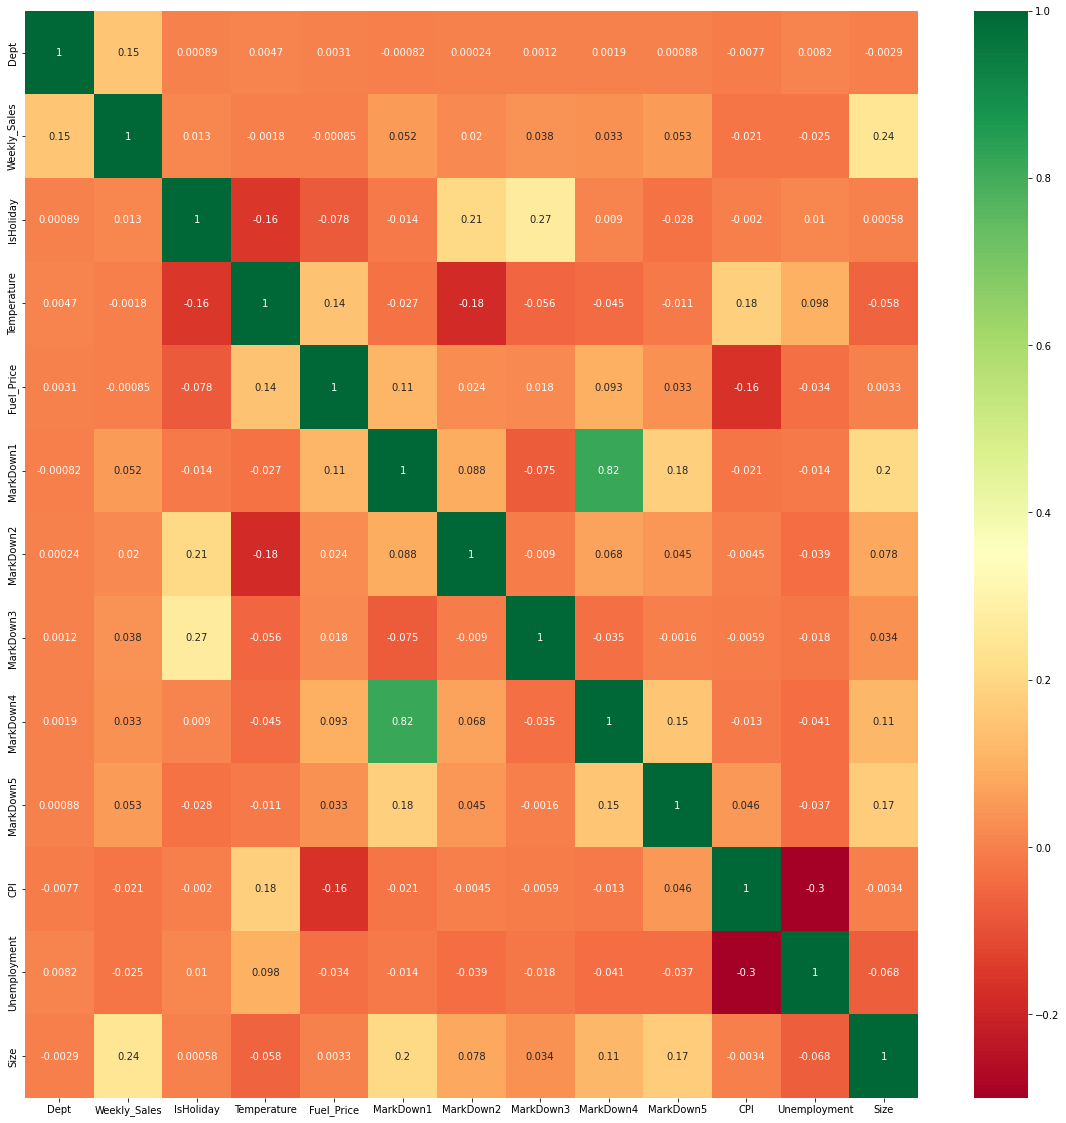

In [17]:
#Plotting Coorelation using Heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset.corr(),annot=True, cmap="RdYlGn")

In [18]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop('Weekly_Sales',axis=1)
y = final_dataset['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
######Feature Importance#######
model = ExtraTreesRegressor()  #This Regression Algorithm will help you in finding out the best features
model.fit(X,y)

ExtraTreesRegressor()

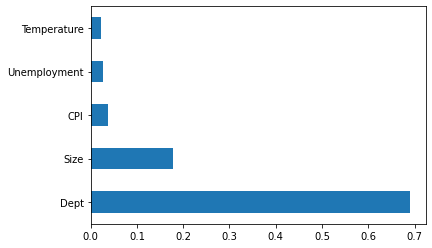

In [20]:
#Plotting the Graph For better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Implementing best models to get the best prediction/least Error

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
y_pred = lr_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

21912.325535008094

In [22]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(x_train,y_train)
y_pred = dec_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7102.646309241869

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5229.923345065733

In [24]:
from sklearn.model_selection import cross_val_score 

#Getting Cross Validation scores of Models

#For Linear Regression
scores = cross_val_score(lr_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-4.85119031e+08 -4.27958273e+08 -5.10745665e+08 -4.47714100e+08
 -5.08482976e+08 -4.83433378e+08 -4.78035256e+08 -4.95598510e+08
 -4.95264569e+08 -4.69616491e+08]
Mean:  -480196824.8134837
Std Deviation:  24764692.218978893


In [25]:
#For Decision Tree 
scores = cross_val_score(dec_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-6.05912487e+07 -6.06539769e+07 -5.97884976e+07 -5.81596187e+07
 -9.66491843e+07 -7.97696622e+07 -6.40243941e+07 -8.53171228e+07
 -1.32804373e+08 -7.52039425e+07]
Mean:  -77296202.07053412
Std Deviation:  22215792.190778323


In [26]:
#For Random Forest
scores = cross_val_score(rf_reg, x_test[:4000], y_test[:4000], scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-8.39953243e+07 -1.16801631e+08 -1.16496938e+08 -1.09277784e+08
 -1.03728118e+08 -8.86472177e+07 -9.71487618e+07 -1.12213113e+08
 -1.28666095e+08 -9.13721009e+07]
Mean:  -104834708.40041795
Std Deviation:  13635199.027034767


In [27]:
#By looking at above results we decide to use Random Forest Model

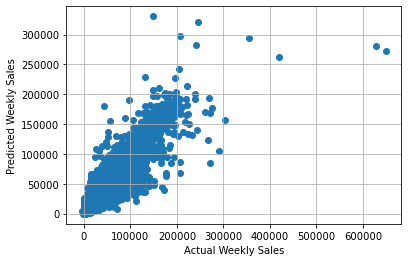

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.grid(True)

In [29]:
#Making a Dataframe for the predicted sales
pred_dataset = pd.DataFrame(np.c_[y_test,y_pred], columns=["Original Sales","Predicted Sales"])
pred_dataset.head(100)

,Original Sales,Predicted Sales
0,6491.69,7381.4135
1,5351.40,5639.9199
2,7241.10,7231.3119
3,5731.90,6102.2814
4,3666.45,2695.5010
...,...,...
95,12631.10,23719.5121
96,10507.48,13840.9987
97,2612.14,3315.1000
98,21.56,32.0856


In [30]:
import sklearn
print("The Accuracy of the model is: ",sklearn.metrics.r2_score(y_test, y_pred)*100)

The Accuracy of the model is:  94.78179052051833


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming final_dataset is prepared with features and target (Weekly_Sales)
X = final_dataset.drop('Weekly_Sales', axis=1).values
y = final_dataset['Weekly_Sales'].values.reshape(-1, 1)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)  # Assuming time-based split





In [32]:
# Reshape data for LSTM input: [samples, time steps, features]
def create_sequences(X, y, time_steps=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:(i + time_steps)])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

In [33]:
time_steps = 1  # Number of time steps (look-back)
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=1)

# Evaluate model on test data
y_pred = model.predict(X_test_seq)

# Inverse transform predictions and actual values (if necessary)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test_seq)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Test RMSE:", rmse)




Epoch 1/50

10584/10584 [==============================] - 49s 4ms/step - loss: 826569792.0000
Epoch 2/50
10584/10584 [==============================] - 46s 4ms/step - loss: 813464768.0000
Epoch 3/50
10584/10584 [==============================] - 46s 4ms/step - loss: 800736512.0000
Epoch 4/50
10584/10584 [==============================] - 46s 4ms/step - loss: 788354688.0000
Epoch 5/50
10584/10584 [==============================] - 48s 5ms/step - loss: 776313536.0000
Epoch 6/50
10584/10584 [==============================] - 45s 4ms/step - loss: 764596672.0000
Epoch 7/50
10584/10584 [==============================] - 44s 4ms/step - loss: 753233920.0000
Epoch 8/50
10584/10584 [==============================] - 45s 4ms/step - loss: 742209472.0000
Epoch 9/50
10584/10584 [==============================] - 45s 4ms/step - loss: 731520704.0000
Epoch 10/50
10584/10584 [==============================] - 44s 4ms/step - loss: 721160576.0000
Epoch 11/50
10584/10584 [==============================]

ValueError: non-broadcastable output operand with shape (84664,1) doesn't match the broadcast shape (84664,12)